In [17]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.10.0


In [18]:
loaded_data = np.loadtxt('./logistic_data/diabetes.csv', delimiter=',')

# training data / test data 분리

seperation_rate = 0.3  # 분리 비율
test_data_num = int(len(loaded_data) * seperation_rate)

np.random.shuffle(loaded_data)

test_data = loaded_data[0:test_data_num]
training_data = loaded_data[test_data_num:]

# training_x_data / training_t__data 생성

training_x_data = training_data[:, 0:-1]
training_t_data = training_data[:, [-1]]

# test_x_data / test_t__data 생성
test_x_data = test_data[:, 0:-1]
test_t_data = test_data[:, [-1]]

print("loaded_data.shape = ", loaded_data.shape)
print("training_x_data.shape = ", training_x_data.shape)
print("training_t_data.shape = ", training_t_data.shape)

print("test_x_data.shape = ", test_x_data.shape)
print("test_t_data.shape = ", test_t_data.shape)

loaded_data.shape =  (768, 9)
training_x_data.shape =  (538, 8)
training_t_data.shape =  (538, 1)
test_x_data.shape =  (229, 8)
test_t_data.shape =  (229, 1)


In [19]:
 # Logistic Regression 을 keras 이용하여 생성 => activation=sigmoid

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1], #(1,)
                input_shape=(training_x_data.shape[1],), #(8,)
                activation='sigmoid')) #

In [20]:
# 학습을 위한 optimizer, 손실 함수 loss 정의

learning_rate = 1e-2
model.compile(optimizer=SGD(learning_rate=learning_rate),
              loss='binary_crossentropy', # 0-1만 결과에 생기도록
              metrics=['accuracy']) # 측정 지표

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(training_x_data, training_t_data, epochs=500, validation_split=0.2, verbose=2)
# validation_split = 0.2 => training data로 부터 20% 비율로 overfitting을 체크 해줌
# verbose => https://buillee.tistory.com/143 (출력 형식)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500


2022-11-09 00:13:18.300119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-09 00:13:18.479464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 - 0s - loss: 38.2810 - accuracy: 0.5233 - val_loss: 13.6374 - val_accuracy: 0.3426 - 322ms/epoch - 23ms/step
Epoch 2/500
14/14 - 0s - loss: 27.3563 - accuracy: 0.5581 - val_loss: 12.2512 - val_accuracy: 0.4352 - 80ms/epoch - 6ms/step
Epoch 3/500
14/14 - 0s - loss: 35.3722 - accuracy: 0.5279 - val_loss: 34.7210 - val_accuracy: 0.6852 - 78ms/epoch - 6ms/step
Epoch 4/500
14/14 - 0s - loss: 30.6277 - accuracy: 0.5721 - val_loss: 14.0183 - val_accuracy: 0.4259 - 79ms/epoch - 6ms/step
Epoch 5/500
14/14 - 0s - loss: 32.8255 - accuracy: 0.5465 - val_loss: 23.2795 - val_accuracy: 0.6667 - 78ms/epoch - 6ms/step
Epoch 6/500
14/14 - 0s - loss: 31.8587 - accuracy: 0.5233 - val_loss: 8.6009 - val_accuracy: 0.6481 - 77ms/epoch - 6ms/step
Epoch 7/500
14/14 - 0s - loss: 29.8611 - accuracy: 0.5535 - val_loss: 10.3388 - val_accuracy: 0.6944 - 75ms/epoch - 5ms/step
Epoch 8/500
14/14 - 0s - loss: 34.0274 - accuracy: 0.5419 - val_loss: 33.3234 - val_accuracy: 0.6852 - 76ms/epoch - 5ms/step
Epoch 9/500

In [22]:
print(model.evaluate(test_x_data, test_t_data))

8/8 [==============================] - 0s 6ms/step - loss: 14.0898 - accuracy: 0.5459
[14.089778900146484, 0.5458515286445618]


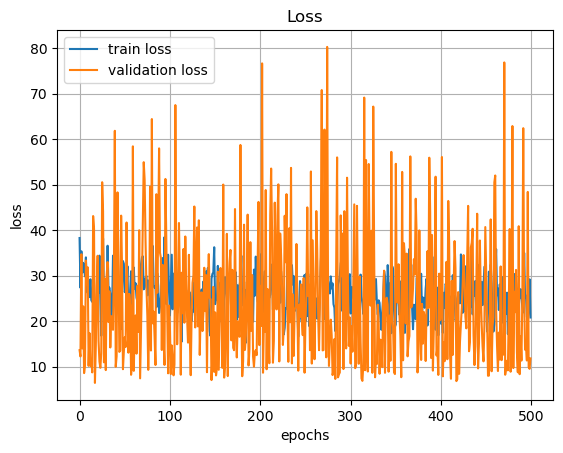

In [23]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()